In [13]:
import pandas as pd
import numpy as np

In [14]:
train_data = pd.read_csv('../data/Train.csv')

In [15]:
test_data = pd.read_csv('../data/Test.csv')

In [16]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Checking for the Data Types

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## checking for the null data

In [18]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The columns "Item weight" and "Outlet Size" are having the null data 

In [19]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Getting the number of the unique values in each column

In [41]:
train_data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [23]:
train_data.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [29]:
train_data.Outlet_Identifier.value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [28]:
train_data.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [27]:
train_data.Outlet_Type.value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [30]:
train_data.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [32]:
train_data.Item_Identifier.unique()

Item_Identifier
FDW13    10
FDG33    10
NCF42     9
FDW26     9
FDX31     9
         ..
FDY43     1
FDO33     1
FDK57     1
FDQ60     1
FDN52     1
Name: count, Length: 1559, dtype: int64

In [33]:
diff_identifier_length = {len(x) for x in train_data.Item_Identifier.unique().tolist()}

In [34]:
diff_identifier_length

{5}

In [39]:
train_data.Item_Identifier.sort_values().unique().tolist()

['DRA12',
 'DRA24',
 'DRA59',
 'DRB01',
 'DRB13',
 'DRB24',
 'DRB25',
 'DRB48',
 'DRC01',
 'DRC12',
 'DRC13',
 'DRC24',
 'DRC25',
 'DRC27',
 'DRC36',
 'DRC49',
 'DRD01',
 'DRD12',
 'DRD13',
 'DRD15',
 'DRD24',
 'DRD25',
 'DRD27',
 'DRD37',
 'DRD49',
 'DRD60',
 'DRE01',
 'DRE03',
 'DRE12',
 'DRE13',
 'DRE15',
 'DRE25',
 'DRE27',
 'DRE37',
 'DRE48',
 'DRE49',
 'DRE60',
 'DRF01',
 'DRF03',
 'DRF13',
 'DRF15',
 'DRF23',
 'DRF25',
 'DRF27',
 'DRF36',
 'DRF37',
 'DRF48',
 'DRF49',
 'DRF51',
 'DRF60',
 'DRG01',
 'DRG03',
 'DRG11',
 'DRG13',
 'DRG15',
 'DRG23',
 'DRG25',
 'DRG27',
 'DRG36',
 'DRG37',
 'DRG39',
 'DRG48',
 'DRG49',
 'DRG51',
 'DRH01',
 'DRH03',
 'DRH11',
 'DRH13',
 'DRH15',
 'DRH23',
 'DRH25',
 'DRH36',
 'DRH37',
 'DRH39',
 'DRH49',
 'DRH51',
 'DRH59',
 'DRI01',
 'DRI03',
 'DRI11',
 'DRI13',
 'DRI23',
 'DRI25',
 'DRI37',
 'DRI39',
 'DRI47',
 'DRI49',
 'DRI51',
 'DRI59',
 'DRJ01',
 'DRJ11',
 'DRJ13',
 'DRJ23',
 'DRJ24',
 'DRJ25',
 'DRJ35',
 'DRJ37',
 'DRJ39',
 'DRJ47',
 'DRJ49',


In [42]:
{x[:2] for x in train_data.Item_Identifier.unique().tolist()}

{'DR', 'FD', 'NC'}

We have Item_Identifier starting with  {'DR','FD','NC'} and followed by [A-Z]

In [47]:
train_data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [45]:
numerical_cols = train_data.select_dtypes(exclude='O').columns
categorical_cols = train_data.select_dtypes(include = 'O').columns

In [46]:
numerical_cols,categorical_cols

(Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
       dtype='object'),
 Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

### Checking the whether test data is compatable to the train data 

In [125]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [145]:
type(train_data.loc[3,'Outlet_Size'])

float

In [139]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [146]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [148]:
test_data.select_dtypes(include='O').columns.tolist()==train_data.select_dtypes(include='O').columns.tolist()

True

In [151]:
test_data.select_dtypes(exclude='O').columns.tolist() <= train_data.select_dtypes(exclude='O').columns.tolist()

True

In [152]:
for col in test_data.select_dtypes(include='O').columns.tolist():
    if test_data[col].unique().tolist() > train_data[col].unique().tolist():
        print(col)

Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Size


In [154]:
{x[:2] for x in test_data['Item_Identifier'].unique().tolist()},{x[:2] for x in train_data['Item_Identifier'].unique().tolist()}

({'DR', 'FD', 'NC'}, {'DR', 'FD', 'NC'})

In [157]:
test_data['Item_Fat_Content'].sort_values().unique().tolist() == train_data['Item_Fat_Content'].sort_values().unique().tolist()

True

In [158]:
test_data['Item_Type'].sort_values().unique().tolist() == train_data['Item_Type'].sort_values().unique().tolist()

True

In [159]:
test_data['Item_Type'].sort_values().unique(),train_data['Item_Type'].sort_values().unique()

(array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
        'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
        'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
        'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object),
 array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
        'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
        'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
        'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object))

In [160]:
test_data['Outlet_Size'].sort_values().unique(),train_data['Outlet_Size'].sort_values().unique()

(array(['High', 'Medium', 'Small', nan], dtype=object),
 array(['High', 'Medium', 'Small', nan], dtype=object))

In [161]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

**Looks like the test data and train data have same category in each columns.**

### Exploratory Data Analysis

In [162]:
import seaborn as sns
from matplotlib import pyplot as plt

<Axes: xlabel='Item_Weight', ylabel='Count'>

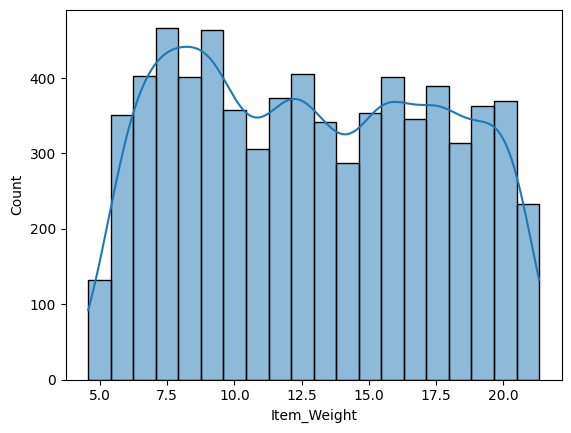

In [163]:
sns.histplot(data=train_data,x='Item_Weight',kde=True)

<Axes: xlabel='Item_Visibility', ylabel='Count'>

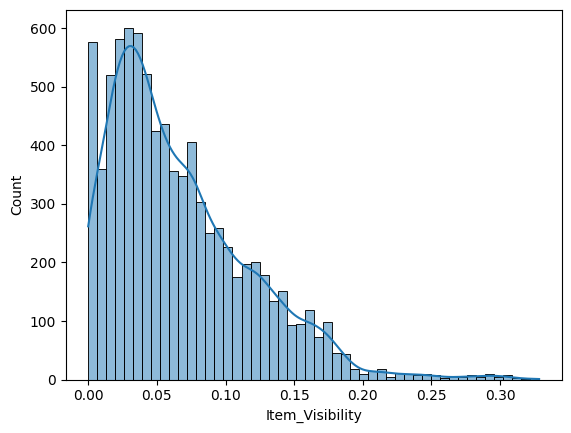

In [164]:
sns.histplot(data=train_data,x='Item_Visibility',kde=True)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

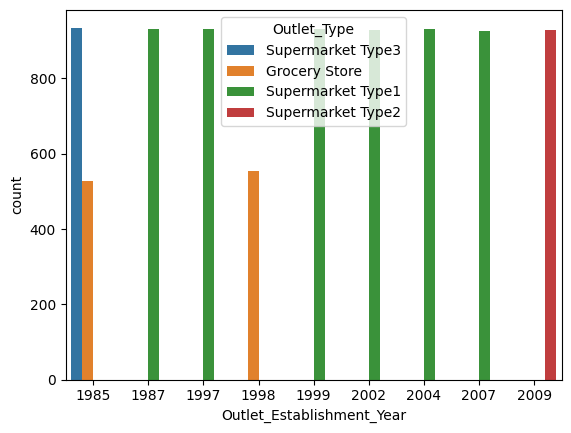

In [165]:

sns.countplot(data=train_data,x='Outlet_Establishment_Year',hue='Outlet_Type')

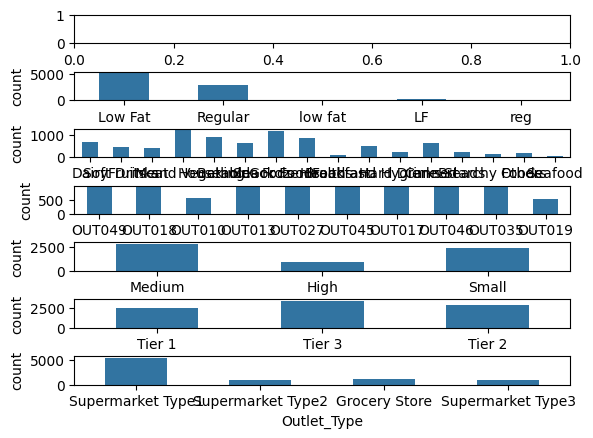

In [166]:
figure,ax = plt.subplots(nrows=len(categorical_cols),ncols = 1)
plt.subplots_adjust(hspace=1)
for i in range(len(categorical_cols)):
    if categorical_cols[i] != 'Item_Identifier':
        sns.countplot(data=train_data,x=categorical_cols[i],ax=ax[i],width=0.5)

C:\Users\guruh\AppData\Local\Temp\ipykernel_2780\1494202276.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train_data['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

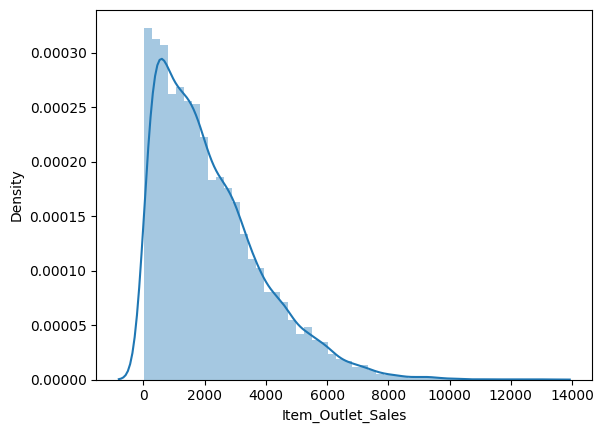

In [167]:
sns.distplot(a=train_data['Item_Outlet_Sales'])

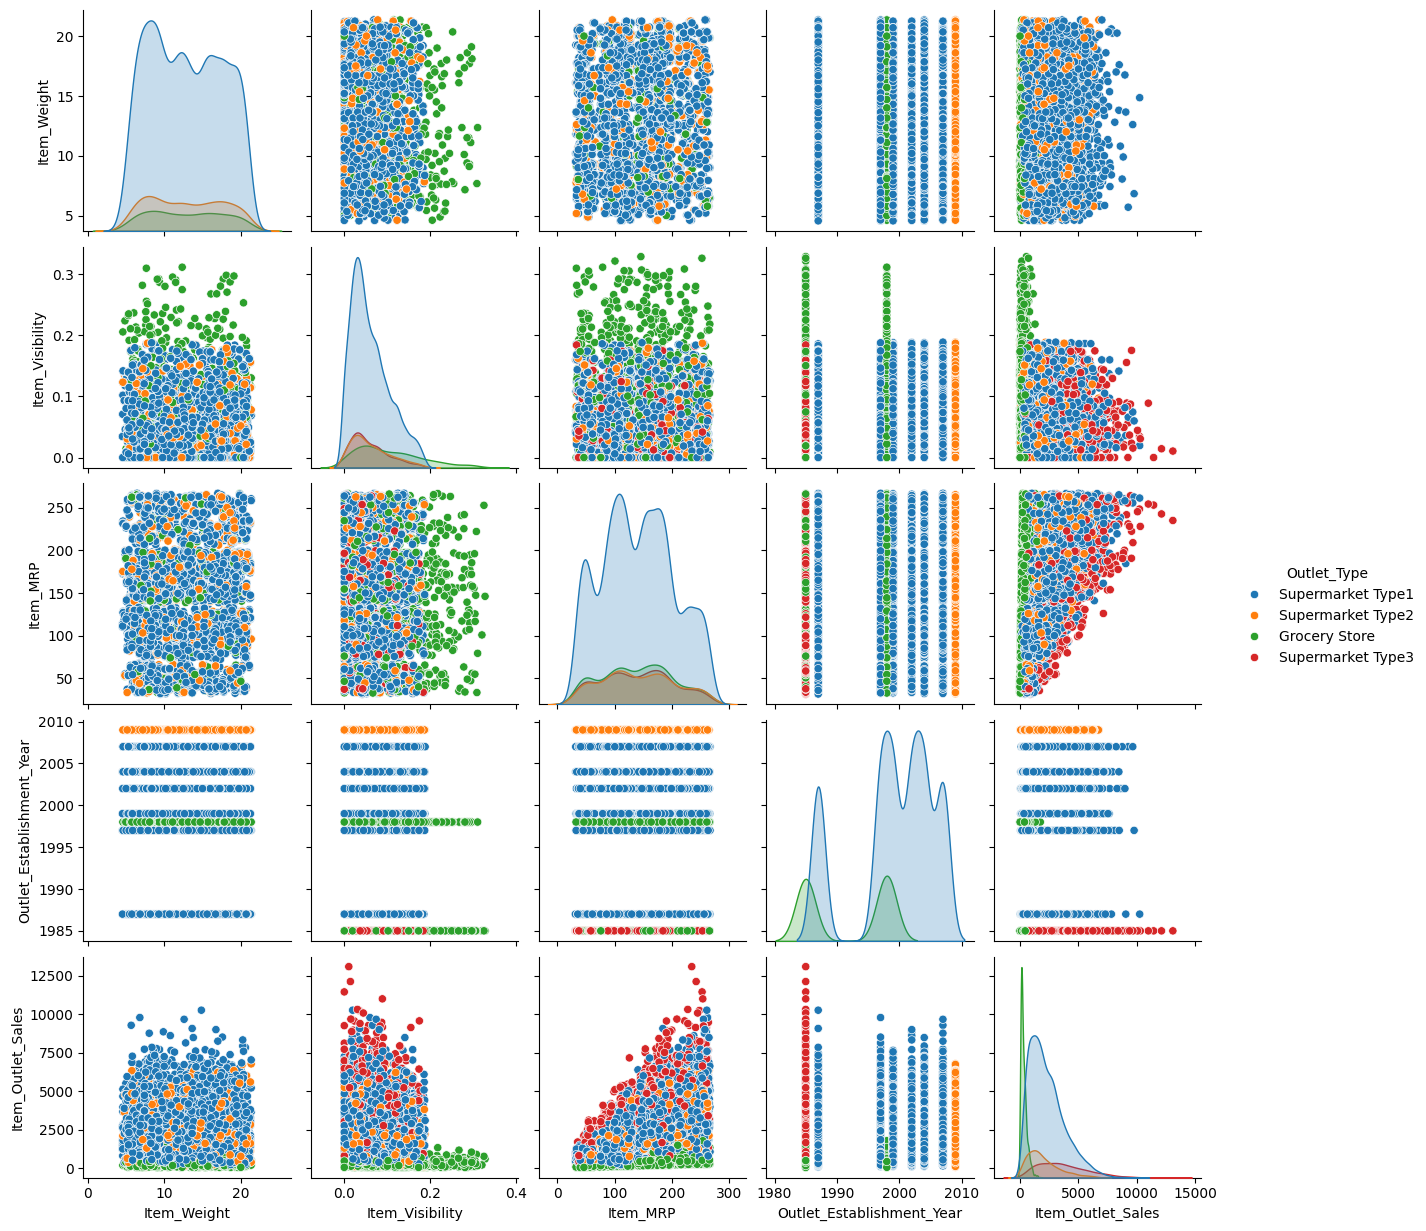

In [168]:
sns.pairplot(data=train_data,hue='Outlet_Type')

<Axes: ylabel='Item_MRP'>

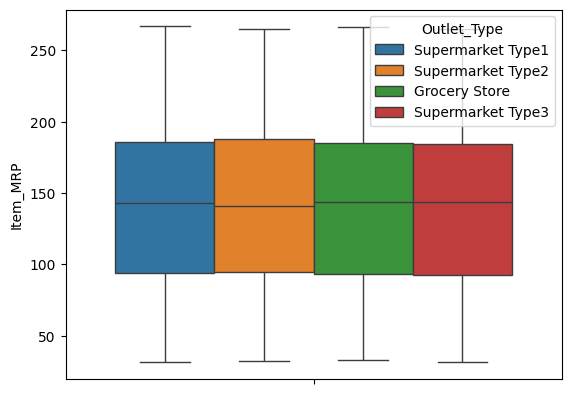

In [191]:
sns.boxplot(data=train_data,y='Item_MRP',hue='Outlet_Type')

<Axes: xlabel='Outlet_Size', ylabel='count'>

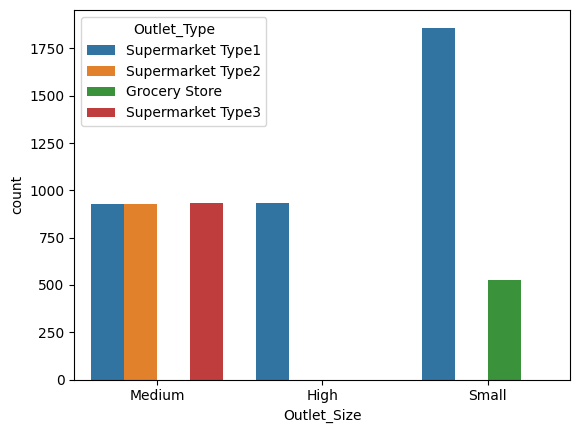

In [169]:
sns.countplot(data=train_data,x='Outlet_Size',hue='Outlet_Type')

<Axes: >

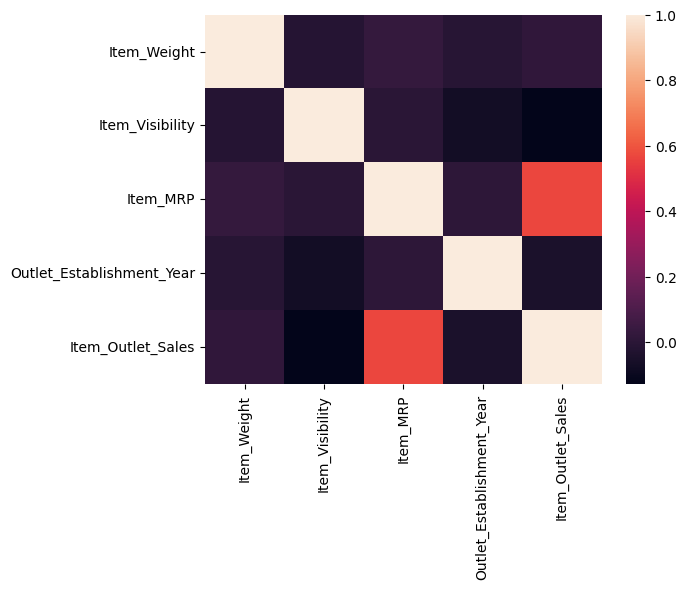

In [170]:
sns.heatmap(train_data.select_dtypes(exclude='O').corr())

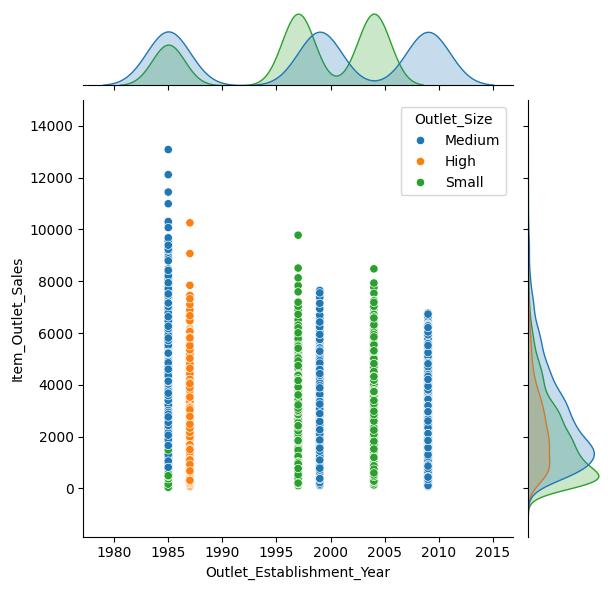

In [171]:
sns.jointplot(data=train_data,y='Item_Outlet_Sales',x='Outlet_Establishment_Year',hue='Outlet_Size')


In [187]:
for col in categorical_cols:
    print(set(train_data.loc[train_data.Outlet_Size.isna(),col]))

{'FDY31', 'FDH34', 'FDI19', 'FDI15', 'NCO41', 'NCM41', 'FDD09', 'NCH30', 'FDV12', 'FDK40', 'NCM43', 'NCR42', 'DRO59', 'NCK54', 'FDN08', 'FDR43', 'FDV56', 'NCS53', 'FDW60', 'FDN04', 'NCM55', 'FDI02', 'FDC33', 'NCR30', 'FDA43', 'FDB08', 'FDT26', 'FDV04', 'FDS26', 'FDR35', 'FDF39', 'NCQ18', 'FDJ09', 'FDU03', 'FDN45', 'FDM28', 'FDG04', 'FDS44', 'NCQ41', 'FDW48', 'FDW11', 'FDU52', 'NCY53', 'FDY08', 'FDJ41', 'FDJ44', 'FDD51', 'FDP31', 'NCV30', 'FDF22', 'FDZ21', 'FDV44', 'FDU34', 'FDH48', 'FDE46', 'FDS39', 'FDI22', 'FDY52', 'FDG09', 'FDC45', 'FDC52', 'DRJ49', 'FDX21', 'FDV49', 'FDI07', 'NCK07', 'FDB60', 'NCE19', 'DRG11', 'FDC16', 'FDE09', 'FDQ39', 'FDD05', 'FDU31', 'FDT27', 'FDQ59', 'FDF21', 'NCD06', 'FDP16', 'FDN44', 'DRK47', 'FDV25', 'FDM10', 'DRK12', 'FDZ02', 'FDQ45', 'FDB32', 'FDS10', 'NCA30', 'FDL38', 'FDM03', 'FDG40', 'FDE11', 'FDB16', 'DRI11', 'FDT32', 'FDH32', 'DRZ11', 'FDE35', 'DRH03', 'NCJ19', 'NCT06', 'FDC04', 'FDC60', 'FDG41', 'FDL36', 'FDU07', 'FDA49', 'FDS31', 'FDU15', 'FDO56', 

([0, 1, 2, 3],
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

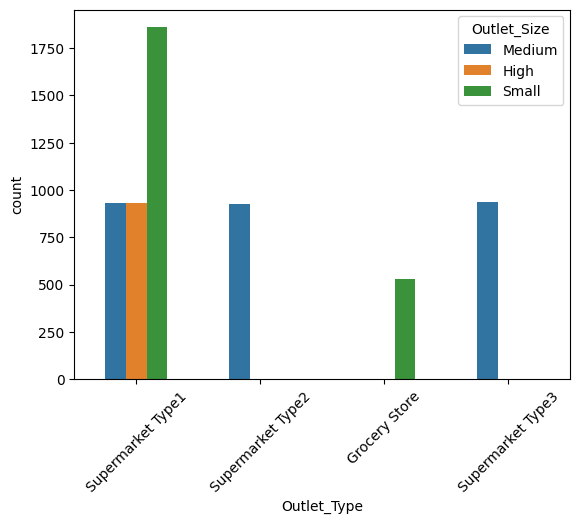

In [200]:
sns.countplot(data = train_data, x = 'Outlet_Type', hue = 'Outlet_Size',width=0.5,)
plt.xticks(rotation=45)

C:\Users\guruh\AppData\Local\Temp\ipykernel_2780\1421867423.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


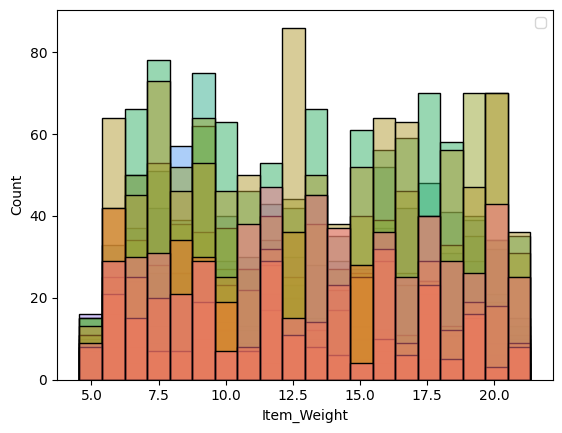

In [204]:
sns.histplot(data = train_data,x='Item_Weight',hue='Item_Type')
plt.legend(loc='best')

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

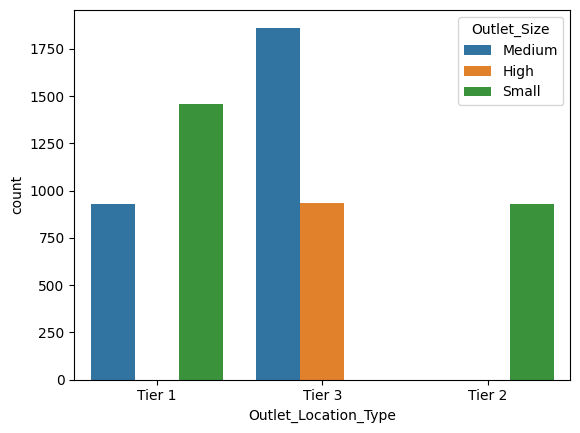

In [208]:
sns.countplot(data=train_data,x='Outlet_Location_Type',hue='Outlet_Size')

In [222]:
train_data[train_data.Outlet_Size.isna()].Outlet_Type.value_counts()

Outlet_Type
Supermarket Type1    1855
Grocery Store         555
Name: count, dtype: int64

In [221]:
train_data[train_data.Outlet_Size.isna()].Outlet_Identifier.value_counts()

Outlet_Identifier
OUT045    929
OUT017    926
OUT010    555
Name: count, dtype: int64

In [223]:
train_data[train_data.Outlet_Identifier=='OUT010'].Outlet_Type.value_counts()

Outlet_Type
Grocery Store    555
Name: count, dtype: int64

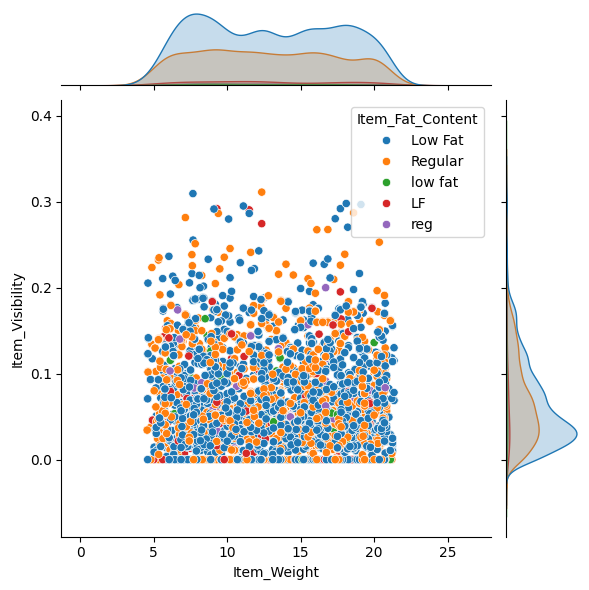

In [228]:
sns.jointplot(data=train_data,x='Item_Weight',y='Item_Visibility',hue='Item_Fat_Content')

In [172]:
numerical_cols,categorical_cols

(Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
       dtype='object'),
 Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

In [173]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

* All grocery stores are small outlets
* The stores opened in 2009 are all supermarket type2
* All null values in Outlet_Size are from three Outlets they are {'OUT010','OUT045','OUT017'}
* The Item Fat Content has to be transformed into two types 'Low Fat', 'Regular'
* The Item Identifier should be encoded based on their initial 3 characters

## Initiating the Data Transformation

### Tasks:

* The item weight,outlet size need to be imputed
* Transform the Fat Content into two types.
* Convert the categorical data into the numerical data by ordinal encoding 
* Let's break the Item Identifier into two features where feature 1 holds first 3 characters and remaining characters should be the second feature

1. The column transformer is used to perform the transformation on the numerical data and categorical data separately.
2. TargetImpute is used for the filling the null values.
3. Finally the StandardScaler is used to scale data.

In [232]:
import logging
import os
from datetime import datetime
LOG_FILE = f"{datetime.now().strftime('%m_%d_%Y_%H_%M_%S')}.log"
logs_path = os.path.join(os.getcwd(),"logs",LOG_FILE)
os.makedirs(logs_path,exist_ok=True)

LOG_FILE_PATH = os.path.join(logs_path,LOG_FILE)

logging.basicConfig(
    filename=LOG_FILE_PATH, 
    format="[%(asctime)s] %(lineno)d %(name)s - %(levelname)s - %(message)s",
    level= logging.INFO,
)

In [235]:
import sys

def error_message_detail(error,error_detail:sys):
    _,_,exc_tb = error_detail.exc_info()
    file_name = exc_tb.tb_frame.f_code.co_filename
    error_message = "Error occured in python script name [{0}] line number [{1}] error message [{2}]".format(
        file_name,exc_tb.tb_lineno,str(error)
    )
    return error_message

class CustomException(Exception):

    def __init__(self,error_message,error_detail:sys):
        super().__init__(error_message)
        self.error_message = error_message_detail(error_message,error_detail=error_detail)

    def __str__(self):
        return self.error_message

In [236]:
from dataclasses import dataclass
import os
import sys
from sklearn._typing import ArrayLike
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator,TransformerMixin
import pandas

@dataclass
class DataTransformationConfig:
    preprocessor_path = os.path.join('artifacts','preprocessor.pkl')

class MiniProcessor(BaseEstimator,TransformerMixin):
    
    def __init__():
        pass

    def fit_transform(self, X: Any | DataFrame) -> ndarray:
        try:
            logging.info('Handling the item identifier and fat content data')
            col_1,col_2,col_3 = self.handle_item_identifier(X['Item_Identifier'])
            fat_content = self.handle_item_fat_Content(X['Item_Fat_content'])
            X['Item_identifier_1'] = col_1
            X['Item_Identifier_2']  = col_2
            X['Item_Identifier_3'] = col_3
            X['Item_new_Fat_Content'] =  fat_content
            X.drop(['Item_Identifier','Item_Fat_Content'],axis=1)
            return X
        except Exception as e:
            CustomException(e,sys)
    
    def transform(self, X: Any | DataFrame) -> ndarray:
        
        try:
            logging.info('Handling the item identifier and fat content data')
            col_1,col_2,col_3 = self.handle_item_identifier(X['Item_Identifier'])
            fat_content = self.handle_item_fat_Content(X['Item_Fat_content'])
            X['Item_identifier_1'] = col_1
            X['Item_Identifier_2']  = col_2
            X['Item_Identifier_3'] = col_3
            X['Item_new_Fat_Content'] =  fat_content
            X.drop(['Item_Identifier','Item_Fat_Content'],axis=1)
            return X
        except Exception as e:
            CustomException(e,sys)
    
    def handle_item_identifer(self,item_identifers):
        
        try:
            col_1 = []
            col_2 = []
            col_3 = []
            col_1_map = {{'DR':0, 'FD':1, 'NC':2}}
            for i in range(item_identifers):
                col_1 = col_1_map[item_identifers[i][:2]]
                col_2 = item_identifers[i][2:3]
                col_3 = item_identifers[i][3:]
            return col_1,col_2,col_3
        except Exception as e:
            CustomException(e,sys)
    
    def handle_item_fat_Content(self,item_fat_content):
        
        try:
            mapped = []
            for i in item_fat_content:
                if i[0]=='L' or x[0]=='l':
                    mapped.append(0)
                else:
                    mapped.append(1)
            return mapped
        except Exception as e:
            raise CustomException(e,sys)
        


class DataTransformation:
    
    def __init__(self):
        self.DataTransformerConfig = DataTransformationConfig()

    def initateDataTransform(self,data):
        try:
            numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
                                'Outlet_Establishment_Year', 'Item_Outlet_Sales']
            
            categorical_cols = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
                                'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
            
            
            
            logging.info('Dividing the data into input and target')
            input_data = data.drop('Item_Outlet_Sales',axis=1)
            target = data['Item_Outlet_Sales']
            logging.info('Performing the transformation on the data')
            preprocessor = self.getDataTransformer()
            transformed_input = preprocessor.fit_transform(input_data)

            
        except Exception as e:
            raise CustomException(e,sys)
            



    def getDataTransformer(self):
        
        try:
            
            new_numerical_cols = ['Item_Weight','Item_Identifier_1','Item_Identifer_2','Item_Identifier_3',
                                'Item_new_Fat_COntent','Item_Visibility','Outlet_Establishment_Year','Item_MRP',]
            
            new_categorical_cols = ['Item_Type', 'Outlet_Identifier',
                                'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
            
            
            logging.info('Building the numerical data transformer')
            numerical_transformer = Pipeline(
                    [
                        ('numerical_simple_inputer',SimpleImputer(strategy = 'mean')),
                        ('numerical_standard_scalar'StandardScaler())
                    ]
                )
            
            logging.info('Building the categorical data transformer')
            categorical_transformer = Pipeline(
                [
                    ('categorical_simple_inputer',SimpleImputer(strategy='mean')),
                    ('categorical_ordinal_encoder',OrdinalEncoder()),
                    ('categorical_standard_scalar',StandardScaler())
                ]
            )

            logging.info('Building the final preprocessor')
            coltransformer = ColumnTransformer(
                [
                    ('numerical_preprocessor',numerical_transformer,new_numerical_cols),
                    ('categorical_preprocessor',categorical_transformer,new_categorical_cols)
                ]
            )
            logging.info('Final Pipeline')
            preprocessor = Pipeline(
                steps = [
                    ('customprocessor',MiniProcessor()),
                    ('Coltransformer',coltransformer)
                ]
            )
            return preprocessor
        except Exception as e:
            raise CustomException(e,sys)
        
        
    
    

SyntaxError: invalid syntax (3475616073.py, line 3)